# EXPLORATORY DATA ANALYSIS

In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [706]:
import sys
sys.version

'3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]'

In [707]:
#Import dataset and drop unnecessary columns
df = pd.read_csv('Train.csv')
health = df.drop(['Vision Sharpness','Hearing Ability (dB)','Medication Use',
                      'Family History','Pollution Exposure','Sun Exposure','Income Level'], axis = 1)

In [708]:
# Convert 'Blood Pressure' into number
health[['Systolic BP', 'Diastolic BP']] = health['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
health.drop(columns='Blood Pressure (s/d)', inplace=True)

# Get the current list of columns
current_columns = health.columns.tolist()

# Define the new order of columns
new_order = current_columns[:3] + ['Systolic BP', 'Diastolic BP'] + current_columns[3:-2]

# Reorder the DataFrame columns
health = health[new_order]


In [709]:
#Rename columns names
health.columns = ['Gender','Height','Weight','Systolic BP','Diastolic BP','Cholesterol Level','BMI','Blood Glucose Level',
                  'Bone Density','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases',
                  'Cognitive Function','Mental Health Status','Sleep Patterns','Stress Levels','Education Level','Age']
health.head()

,Gender,Height,Weight,Systolic BP,Diastolic BP,Cholesterol Level,BMI,Blood Glucose Level,Bone Density,Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Education Level,Age
0,Male,171.148359,86.185197,151.0,109.0,259.465814,29.423017,157.652848,0.132868,Moderate,Former,NaN,Low-carb,NaN,44.059172,Good,Insomnia,2.797064,NaN,89
1,Male,172.946206,79.641937,134.0,112.0,263.630292,26.626847,118.507805,0.629534,Low,Current,Occasional,Balanced,Hypertension,45.312298,Good,Normal,9.339930,Undergraduate,77
2,Female,155.945488,49.167058,160.0,101.0,207.846206,20.217553,143.587550,0.473487,Moderate,Never,NaN,Balanced,Hypertension,56.246991,Poor,Insomnia,9.234637,NaN,70
3,Female,169.078298,56.017921,133.0,94.0,253.283779,19.595270,137.448581,1.184315,Moderate,Never,NaN,Balanced,Diabetes,55.196092,Poor,Insomnia,4.693446,NaN,52
4,Female,163.758355,73.966304,170.0,106.0,236.119899,27.582078,145.328695,0.434562,Low,Former,Frequent,Vegetarian,NaN,53.023379,Good,Normal,4.038537,Undergraduate,79


In [710]:
health.columns

Index(['Gender', 'Height', 'Weight', 'Systolic BP', 'Diastolic BP',
       'Cholesterol Level', 'BMI', 'Blood Glucose Level', 'Bone Density',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diet', 'Chronic Diseases', 'Cognitive Function',
       'Mental Health Status', 'Sleep Patterns', 'Stress Levels',
       'Education Level', 'Age'],
      dtype='object')

In [711]:
health.shape

(3000, 20)

In [712]:
health.dtypes

Gender                      object
Height                     float64
Weight                     float64
Systolic BP                float64
Diastolic BP               float64
Cholesterol Level          float64
BMI                        float64
Blood Glucose Level        float64
Bone Density               float64
Physical Activity Level     object
Smoking Status              object
Alcohol Consumption         object
Diet                        object
Chronic Diseases            object
Cognitive Function         float64
Mental Health Status        object
Sleep Patterns              object
Stress Levels              float64
Education Level             object
Age                          int64
dtype: object

In [713]:
health.describe()

,Height,Weight,Systolic BP,Diastolic BP,Cholesterol Level,BMI,Blood Glucose Level,Bone Density,Cognitive Function,Stress Levels,Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,146.027333,95.567000,234.029794,25.550146,126.653909,0.931899,63.868376,5.476507,53.485667
std,9.293006,13.190734,15.968080,9.923256,24.521436,4.367322,18.226124,0.443550,11.755738,2.584901,20.569690
min,141.130985,32.537672,97.000000,60.000000,148.811514,12.049900,69.866884,-0.219787,30.382098,1.000428,18.000000
25%,161.629515,63.222773,135.000000,89.000000,216.756601,22.454115,114.392605,0.561063,55.647794,3.221745,36.000000
50%,168.215632,71.448651,146.000000,95.000000,234.376822,25.352113,126.802186,0.939585,64.014652,5.496618,53.000000
75%,175.522665,81.702801,157.000000,103.000000,250.646674,28.403543,139.377079,1.294570,72.087453,7.680320,72.000000
max,198.112215,123.598603,193.000000,133.000000,331.300589,43.329869,185.736144,1.999829,106.479831,9.996323,89.000000


In [714]:
# Checking missing values 
percent_null = health.isnull().sum()/len(health) * 100 
print(percent_null)

Gender                      0.000000
Height                      0.000000
Weight                      0.000000
Systolic BP                 0.000000
Diastolic BP                0.000000
Cholesterol Level           0.000000
BMI                         0.000000
Blood Glucose Level         0.000000
Bone Density                0.000000
Physical Activity Level     0.000000
Smoking Status              0.000000
Alcohol Consumption        40.033333
Diet                        0.000000
Chronic Diseases           43.300000
Cognitive Function          0.000000
Mental Health Status        0.000000
Sleep Patterns              0.000000
Stress Levels               0.000000
Education Level            20.900000
Age                         0.000000
dtype: float64


In [715]:
# Replace null values with 'None'
health= health.fillna('None')

In [716]:
health.isnull().sum()

Gender                     0
Height                     0
Weight                     0
Systolic BP                0
Diastolic BP               0
Cholesterol Level          0
BMI                        0
Blood Glucose Level        0
Bone Density               0
Physical Activity Level    0
Smoking Status             0
Alcohol Consumption        0
Diet                       0
Chronic Diseases           0
Cognitive Function         0
Mental Health Status       0
Sleep Patterns             0
Stress Levels              0
Education Level            0
Age                        0
dtype: int64

# Physical Attributes

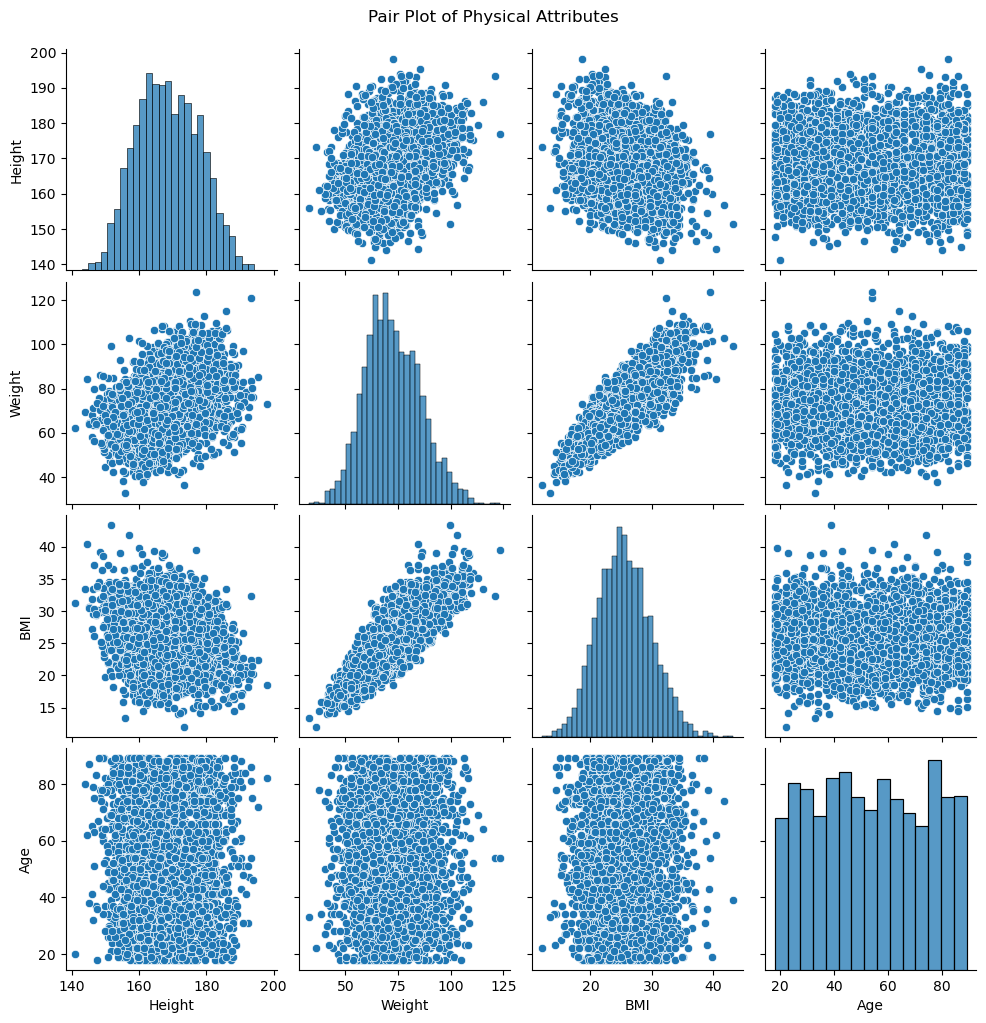

In [718]:
sns.pairplot(health[['Height', 'Weight', 'BMI', 'Age']])
plt.suptitle('Pair Plot of Physical Attributes', y=1.02)
plt.show()

# Health Factors

## Cholesterol level

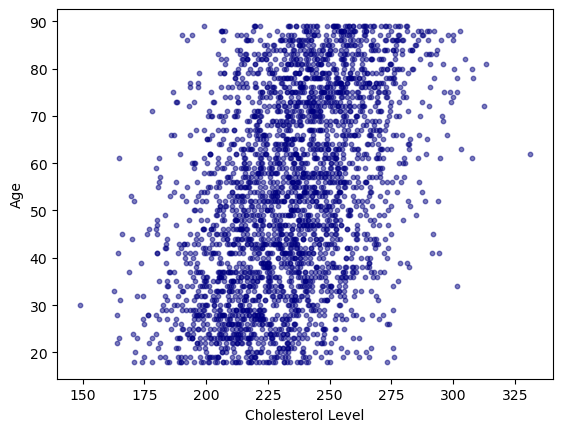

In [721]:
plt.scatter("Cholesterol Level", "Age", data = health, alpha = 0.5, s = 10, c='navy')
plt.xlabel('Cholesterol Level')
plt.ylabel('Age')
plt.show()

## Chronic Disease

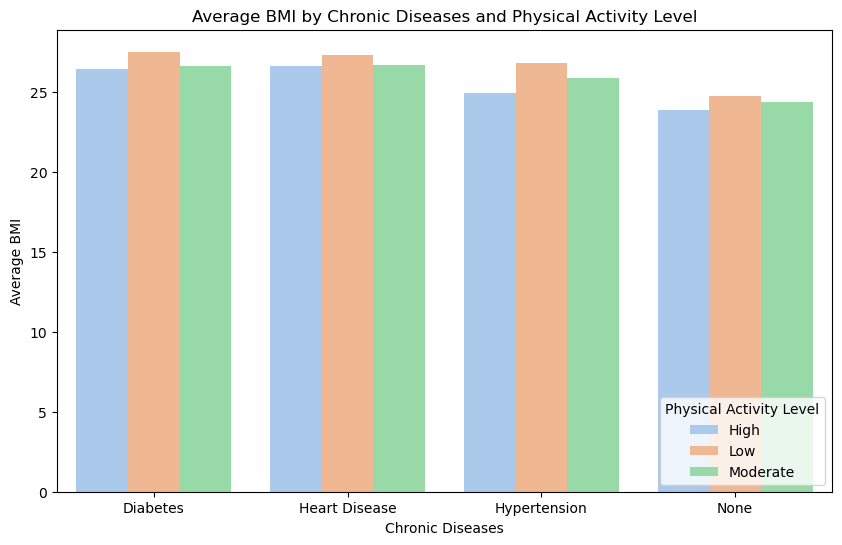

In [723]:
if all(col in health.columns for col in ['Chronic Diseases', 'Smoking Status', 'BMI']):
    # Aggregate data to find average BMI for each Chronic Disease-Physical Activity Level combination
    avg_bp = health.groupby(['Chronic Diseases', 'Physical Activity Level'])['BMI'].mean().reset_index()
    # Create a grouped bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Chronic Diseases', y='BMI', hue='Physical Activity Level', data=avg_bp, palette='pastel')
    plt.title('Average BMI by Chronic Diseases and Physical Activity Level')
    plt.xlabel('Chronic Diseases')
    plt.ylabel('Average BMI')
    plt.legend(title='Physical Activity Level', loc='lower right')
    plt.show()

## Bone Density

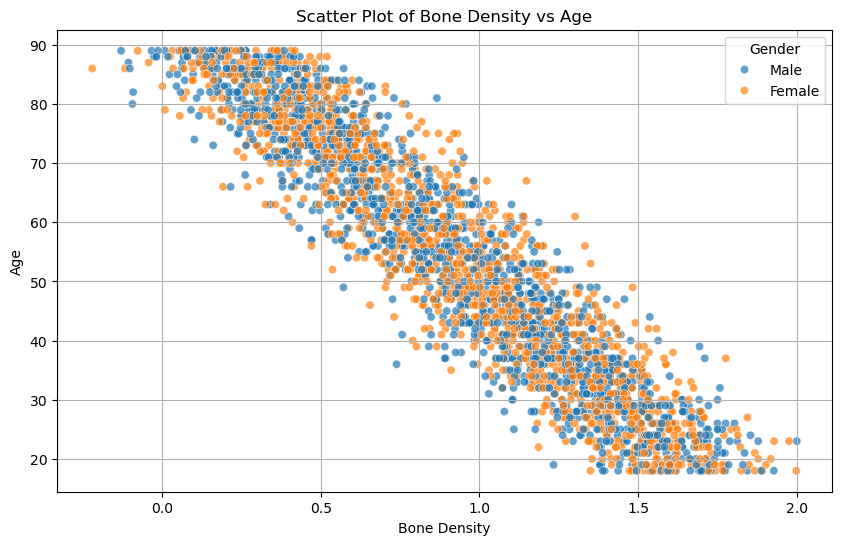

In [725]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=health, x='Bone Density', y='Age',hue ='Gender', color='blue', alpha=0.7)
plt.title('Scatter Plot of Bone Density vs Age')
plt.xlabel('Bone Density')
plt.ylabel('Age')
plt.grid(True)
plt.show()

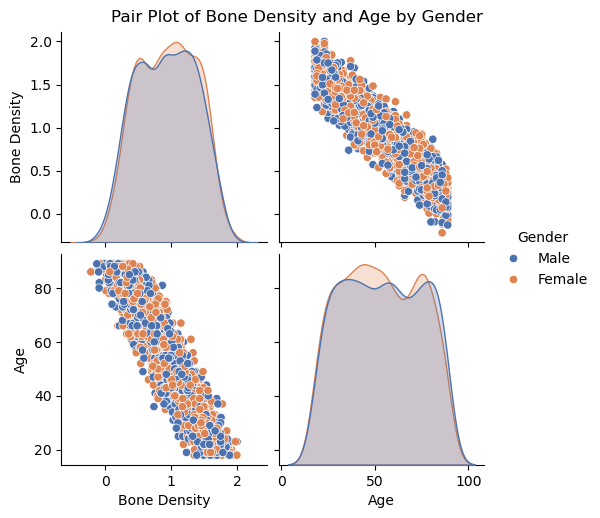

In [726]:
sns.pairplot(health, hue='Gender', vars=['Bone Density', 'Age'], palette='deep')
plt.suptitle('Pair Plot of Bone Density and Age by Gender', y=1.02)
plt.show()

# Lifestyle Factors

## Diet Types & Blood Glucose Level

In [729]:
# Create table
data = {'Diet Category': ['vegetarian', 'Low-carb', 'Balanced', 'High-fat'],
        'Count(Person)': [550, 605, 1183, 662],
        'Percentage': ['18%', '20%', '39%', '22%']}
diet = pd.DataFrame(data)
diet.head()

,Diet Category,Count(Person),Percentage
0,vegetarian,550,18%
1,Low-carb,605,20%
2,Balanced,1183,39%
3,High-fat,662,22%


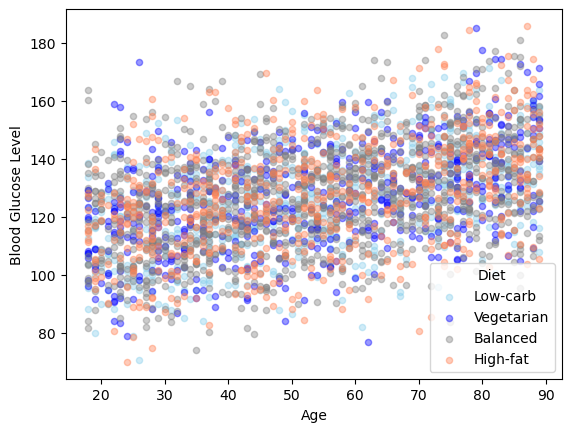

In [730]:
colors = ['skyblue', 'b', 'grey', 'coral']
Label_Com = ['Low-carb', 'Vegetarian', 'Balanced', 'High-fat']

# Iterate through the unique values in the `Diet` column
for i, diet in enumerate(Label_Com):
    plt.scatter(health.loc[health['Diet'] == diet]['Age'],
                health.loc[health['Diet'] == diet]['Blood Glucose Level'],
                s=20, c=colors[i], alpha=0.4, label=diet)

plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.legend(title='Diet')  
plt.show()

## Smoking and Alcohol Consumption

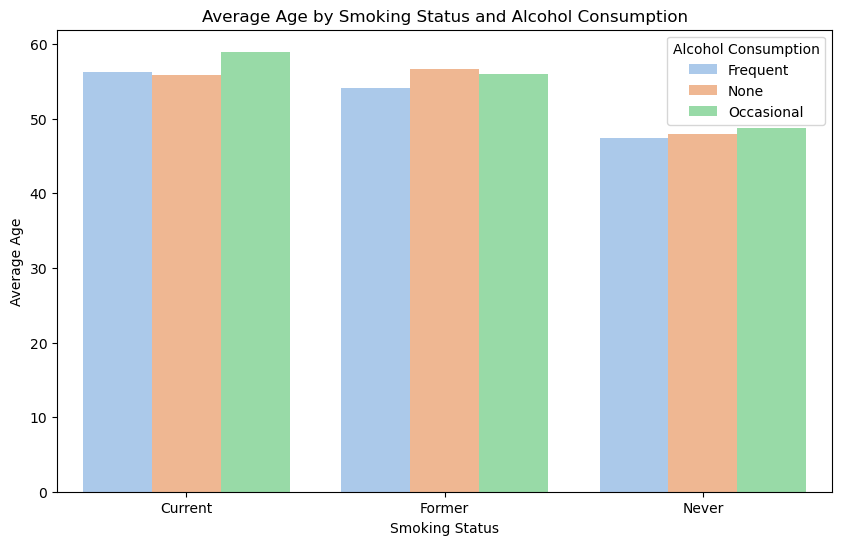

In [732]:
if all(col in health.columns for col in ['Smoking Status', 'Alcohol Consumption', 'Age']):
    # Aggregate data to find average age for each Alcolhol Consumption-Smoking Status combination
    avg_bp = health.groupby(['Smoking Status', 'Alcohol Consumption'])['Age'].mean().reset_index()
 
    # Create a grouped bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Smoking Status', y='Age', hue='Alcohol Consumption', data=avg_bp, palette='pastel')
    plt.title('Average Age by Smoking Status and Alcohol Consumption')
    plt.xlabel('Smoking Status')
    plt.ylabel('Average Age')
    plt.legend(title='Alcohol Consumption')
    plt.show()

# Mental and Emotional Health

## Cognitive Function 

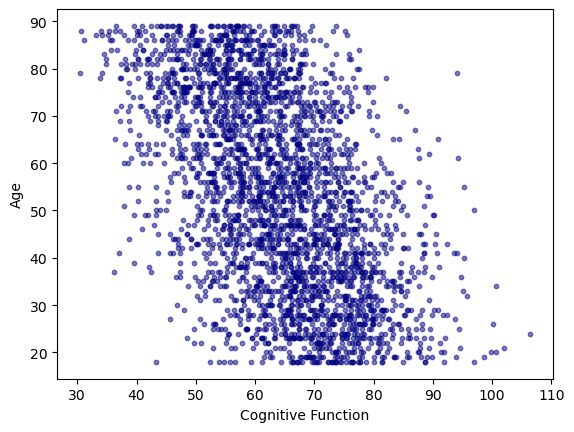

In [735]:
plt.scatter("Cognitive Function", "Age", data = health, alpha = 0.5, s = 10, c='navy')
plt.xlabel('Cognitive Function')
plt.ylabel('Age')
plt.show()

### Mental Health Status

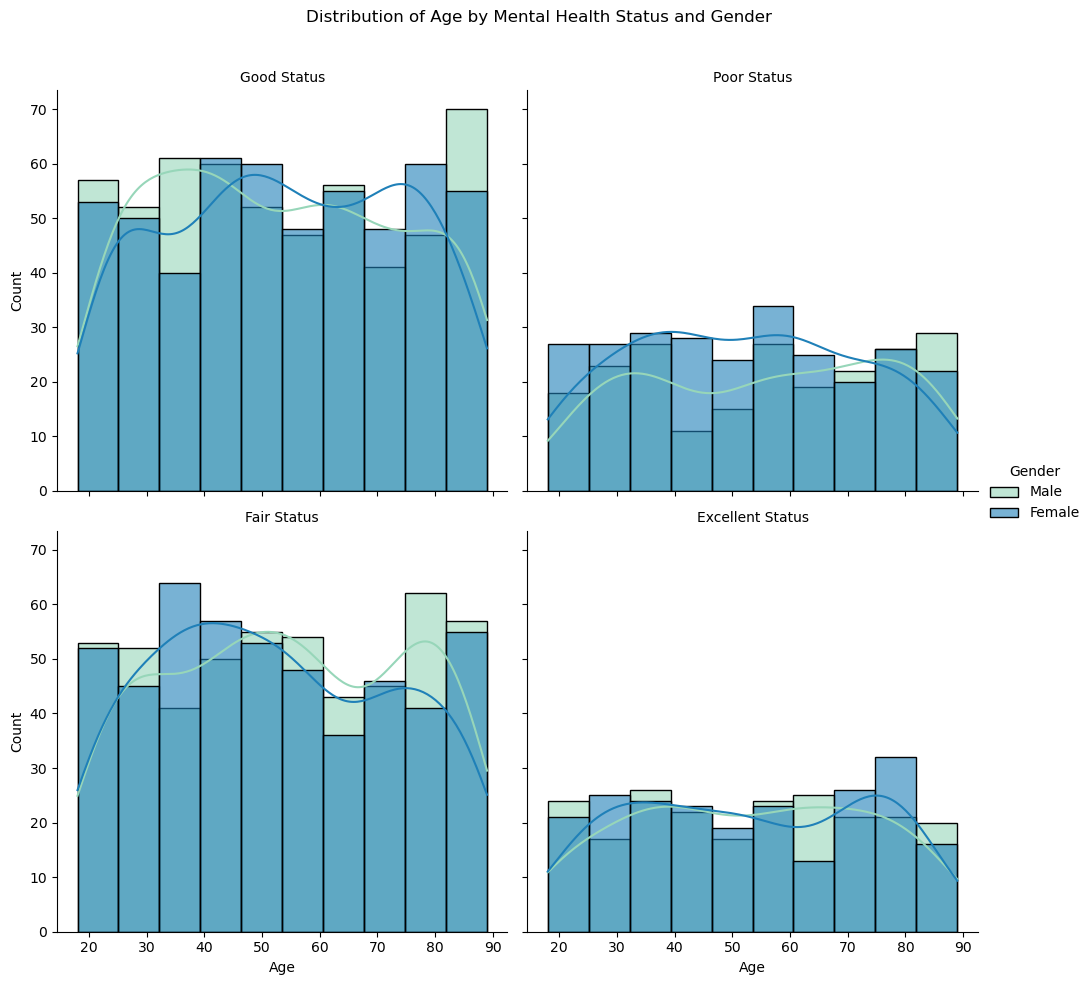

In [737]:
g = sns.FacetGrid(health, col='Mental Health Status', hue='Gender', height=5, aspect=1, palette='YlGnBu', col_wrap=2)
g.map(sns.histplot, 'Age', bins=10, alpha=0.6, kde=True) 
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template="{col_name} Status")
g.add_legend(title='Gender')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Age by Mental Health Status and Gender') 
plt.show()

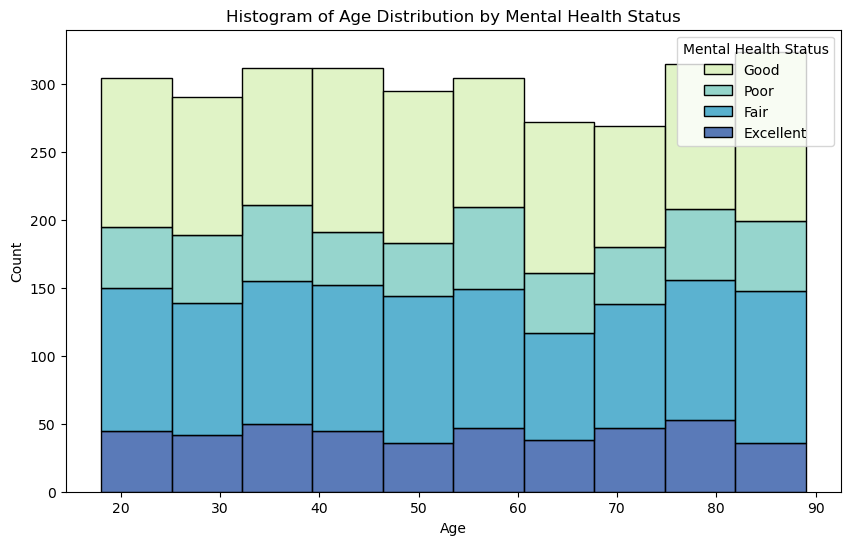

In [738]:
plt.figure(figsize=(10, 6))
sns.histplot(data=health, x='Age', hue='Mental Health Status', multiple='stack', bins=10, palette='YlGnBu')
plt.title('Histogram of Age Distribution by Mental Health Status')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

### Sleep Patterns

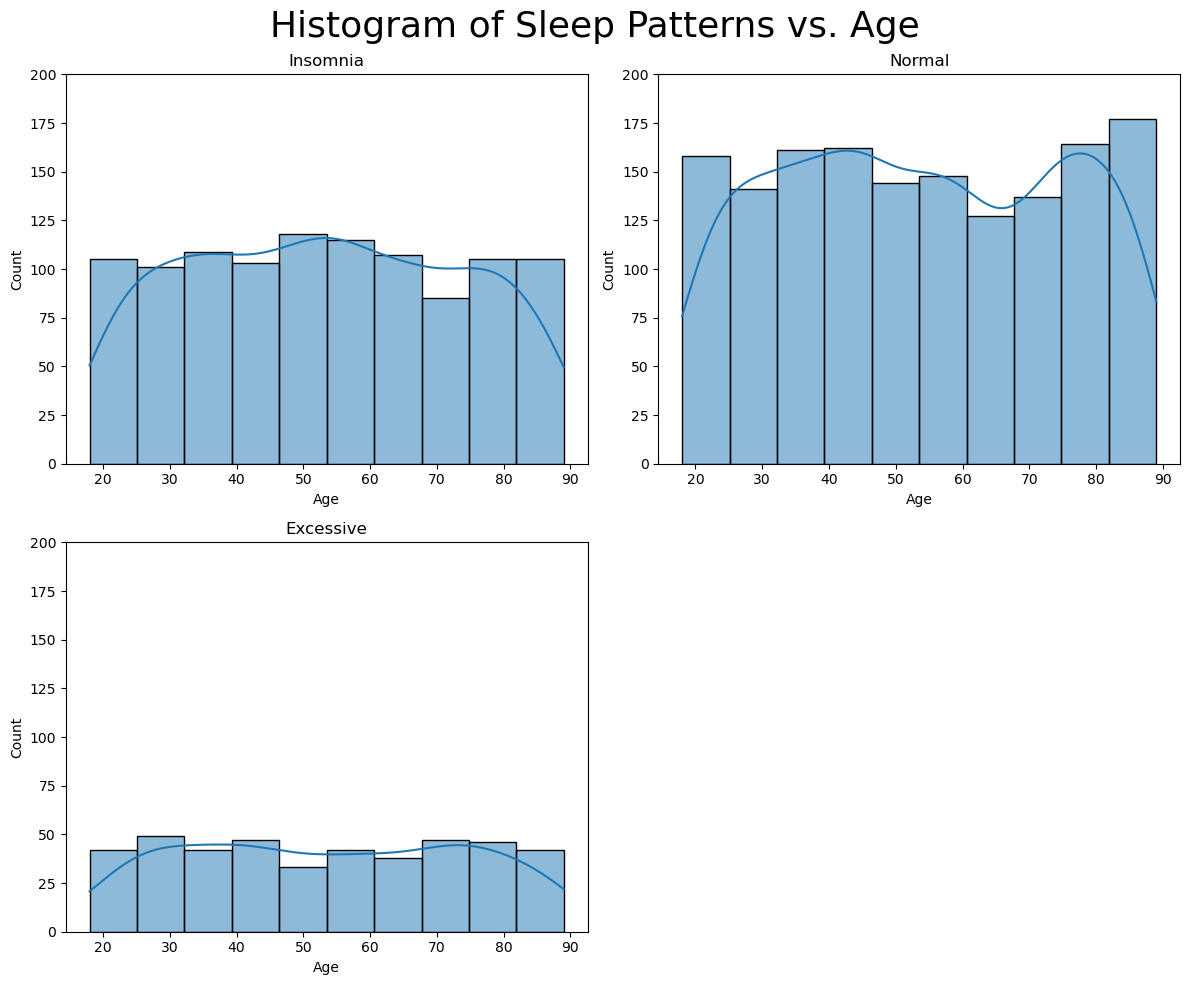

In [740]:
#Age Distribution for per Sleep Patterns
health_status = health['Sleep Patterns'].unique()
n = len(health_status)
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
axes = axes.flatten()  

# Plot histogram for each Sleep Patterns
for i, status in enumerate(health_status):
    ax = axes[i]
    sns.histplot(data=health[health['Sleep Patterns'] == status], 
                 x='Age', 
                 bins=10, 
                 ax=ax, 
                 kde=True)  
    ax.set_title(f'{status}')
    ax.set_xlabel('Age')
    ax.set_ylim(0, 200)
# Delete unnecessary subplots
for i in range(len(health_status), len(axes)):
    fig.delaxes(axes[i])

# Add a main title for the entire figure
fig.suptitle('Histogram of Sleep Patterns vs. Age', fontsize=26)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Sleep Patterns by Age')

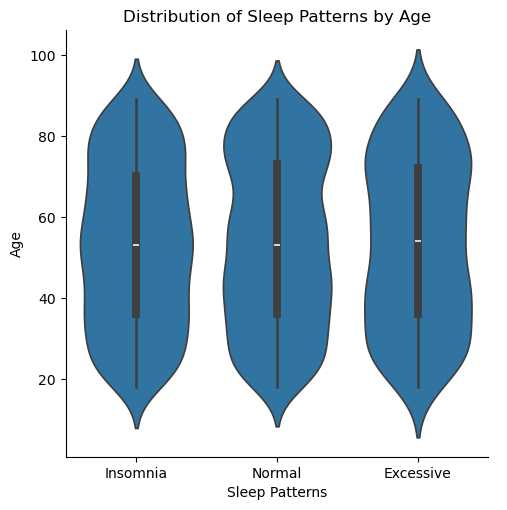

In [741]:
#Distribution of Sleep Patterns by Age
sns.catplot(kind = 'violin', data = health, x = 'Sleep Patterns', y = 'Age' )
plt.title('Distribution of Sleep Patterns by Age')

### Stress Levels

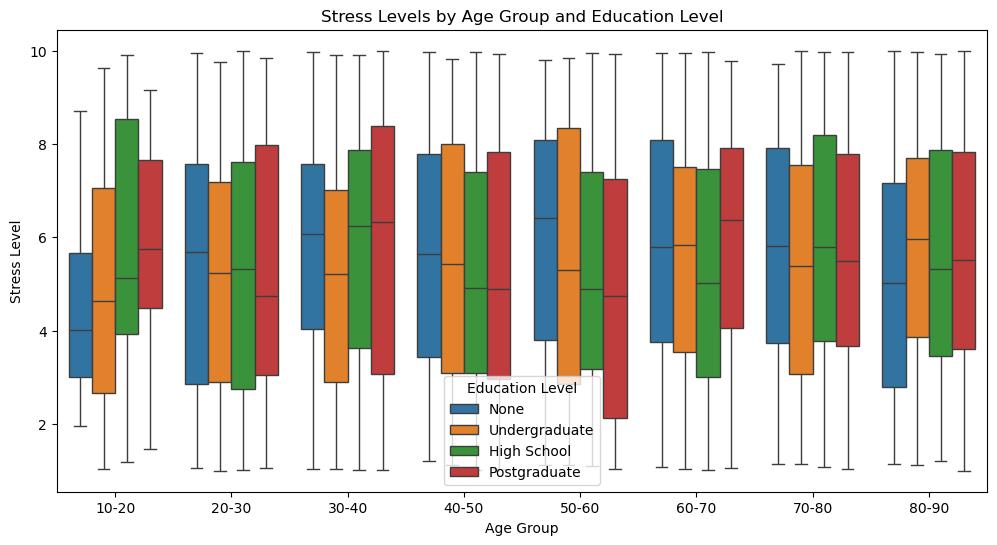

In [743]:
# Define Age Groups
health['Age Group'] = pd.cut(health['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Stress Levels', hue='Education Level', data=health)
plt.title("Stress Levels by Age Group and Education Level")
plt.xlabel("Age Group")
plt.ylabel("Stress Level")
plt.legend(title="Education Level", loc=8)
plt.show()

### Summary

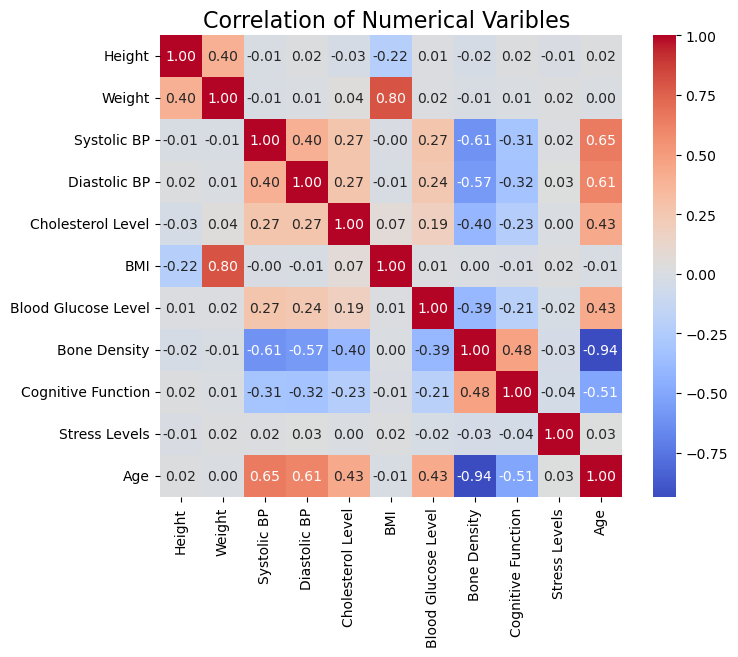

In [745]:
numerical_data = health.select_dtypes(include=[np.number]) #Select numerical data
correlation_matrix = numerical_data.corr()

# Create a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation of Numerical Varibles ', fontsize=16)
plt.show()

# SUPERVISED LEARNING

In [755]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [756]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(health, columns=['Gender', 'Smoking Status', 'Alcohol Consumption', 'Diet', 
                                          'Chronic Diseases', 'Sleep Patterns', 'Education Level'], drop_first=True)

df_encoded = df_encoded.map(lambda x: int(x) if isinstance(x, bool) else x)

# Ordinal encoding
ordinal_encoder_activity = OrdinalEncoder(categories=[['Low', 'Moderate', 'High']])
ordinal_encoder_mental_health = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Excellent']])

df_encoded['Physical Activity Level'] = ordinal_encoder_activity.fit_transform(health[['Physical Activity Level']])
df_encoded['Mental Health Status'] = ordinal_encoder_mental_health.fit_transform(health[['Mental Health Status']])

# Select the columns to include in the model
feature_cols = [col for col in df_encoded.columns if col not in ['Age', 'Age Group','Cluster']]

# Separate features and target variable
X = df_encoded[feature_cols]
y = df_encoded['Age']
X.columns

Index(['Height', 'Weight', 'Systolic BP', 'Diastolic BP', 'Cholesterol Level',
       'BMI', 'Blood Glucose Level', 'Bone Density', 'Physical Activity Level',
       'Cognitive Function', 'Mental Health Status', 'Stress Levels',
       'Gender_Male', 'Smoking Status_Former', 'Smoking Status_Never',
       'Alcohol Consumption_None', 'Alcohol Consumption_Occasional',
       'Diet_High-fat', 'Diet_Low-carb', 'Diet_Vegetarian',
       'Chronic Diseases_Heart Disease', 'Chronic Diseases_Hypertension',
       'Chronic Diseases_None', 'Sleep Patterns_Insomnia',
       'Sleep Patterns_Normal', 'Education Level_None',
       'Education Level_Postgraduate', 'Education Level_Undergraduate'],
      dtype='object')

In [757]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  
    "Lasso Regression": Lasso(alpha=0.1), 
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),  
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42), 
}

# Create DataFrame to save results
results = []

# Train and Evaluate the model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Caculate R² Score, RMSE and MAE
    r2_valid = r2_score(y_test, y_pred)
    rmse_VIF = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_VIF = mean_absolute_error(y_test, y_pred)
    
    results.append({"Model": model_name, "R² Score": r2_valid, "RMSE": rmse_VIF, "MAE": mae_VIF})


results_df = pd.DataFrame(results)
print(results_df)

               Model  R² Score      RMSE       MAE
0  Linear Regression  0.898107  6.461820  5.083213
1   Ridge Regression  0.898135  6.460954  5.082461
2   Lasso Regression  0.898772  6.440724  5.065372
3      Decision Tree  0.860429  7.562771  5.995877
4      Random Forest  0.890151  6.709352  5.291900


## Lasso Regression

In [759]:
# Initialize the Lasso Regression model
alpha_value = 0.1
lasso_model = Lasso(alpha=alpha_value)

# Train the model
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Retrieve coefficients and intercept
coefficients_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_

# Create DataFrame to display the parameters
param_df_lasso = pd.DataFrame({'Feature': feature_cols, 'Coefficient': coefficients_lasso})

# Add the intercept to the DataFrame
intercept_df_lasso = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': intercept_lasso})
param_df_lasso = pd.concat([param_df_lasso, intercept_df_lasso], ignore_index=True)

# Display the parameter table
print("Parameters (Coefficients):")
print(param_df_lasso)

# Evaluate the model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  # Root Mean Squared Error
r2_lasso = r2_score(y_test, y_pred_lasso)  # R-squared
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)  # Mean Absolute Error

# Display the evaluation metrics
print("\nModel Evaluation Metrics:")
print("RMSE:", rmse_lasso)
print("R^2:", r2_lasso)
print("MAE:", mae_lasso)

Parameters (Coefficients):
                           Feature  Coefficient
0                           Height     0.000000
1                           Weight    -0.000000
2                      Systolic BP     2.128475
3                     Diastolic BP     1.846945
4                Cholesterol Level     1.008523
5                              BMI    -0.028556
6              Blood Glucose Level     1.109669
7                     Bone Density   -15.511905
8          Physical Activity Level    -0.064560
9               Cognitive Function    -1.136723
10            Mental Health Status     0.000000
11                   Stress Levels     0.000000
12                     Gender_Male     0.000000
13           Smoking Status_Former     0.000000
14            Smoking Status_Never    -0.401948
15        Alcohol Consumption_None    -0.000000
16  Alcohol Consumption_Occasional     0.000000
17                   Diet_High-fat    -0.212193
18                   Diet_Low-carb    -0.040602
19           

### VIF values

In [761]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) 
                       for i in range(dataframe.shape[1])]
    return vif_data

# Convert X_train_scaled to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols)

# Display VIF values
vif_data = calculate_vif(X_train_scaled_df)
print("VIF of the variables:")
print(vif_data)

VIF of the variables:
                           Feature        VIF
0                           Height  39.941177
1                           Weight  99.874864
2                      Systolic BP   1.635449
3                     Diastolic BP   1.503745
4                Cholesterol Level   1.212761
5                              BMI  90.360631
6              Blood Glucose Level   1.199735
7                     Bone Density   2.522297
8          Physical Activity Level   1.021458
9               Cognitive Function   1.324819
10            Mental Health Status   1.064168
11                   Stress Levels   1.013813
12                     Gender_Male   2.508397
13           Smoking Status_Former   1.540556
14            Smoking Status_Never   1.565683
15        Alcohol Consumption_None   1.583224
16  Alcohol Consumption_Occasional   1.588840
17                   Diet_High-fat   1.227940
18                   Diet_Low-carb   1.216790
19                 Diet_Vegetarian   1.214255
20  Chronic 

## Linear Regression

In [763]:
# Train the model using Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Retrieve coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create DataFrame to display parameters
param_df = pd.DataFrame({'Feature':feature_cols , 'Coefficient': coefficients})

# Add intercept to DataFrame
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
param_df = pd.concat([param_df, intercept_df], ignore_index=True)

# Display parameter table
print(param_df)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("R^2:", r2)
print("MAE:", mae)


                           Feature  Coefficient
0                           Height    -0.738418
1                           Weight     1.250872
2                      Systolic BP     2.177465
3                     Diastolic BP     1.901882
4                Cholesterol Level     1.078800
5                              BMI    -1.348231
6              Blood Glucose Level     1.171988
7                     Bone Density   -15.473800
8          Physical Activity Level    -0.172962
9               Cognitive Function    -1.191897
10            Mental Health Status     0.099211
11                   Stress Levels     0.041411
12                     Gender_Male     0.057405
13           Smoking Status_Former    -0.071862
14            Smoking Status_Never    -0.522987
15        Alcohol Consumption_None     0.024590
16  Alcohol Consumption_Occasional     0.079972
17                   Diet_High-fat    -0.338268
18                   Diet_Low-carb    -0.172091
19                 Diet_Vegetarian     0

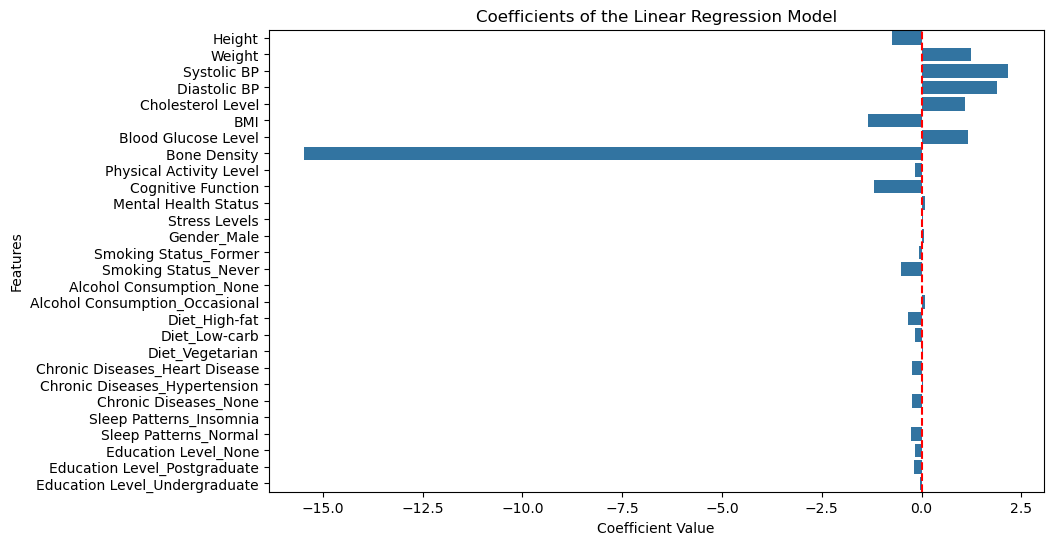

In [764]:
#Create chart showing correlations among cofficients
# Remove Intercept
param_df_filtered = param_df[param_df['Feature'] != 'Intercept']

# Create a chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=param_df_filtered)
plt.title('Coefficients of the Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='red', linestyle='--')  
plt.show()